In [1]:
import cv2, math,json,geopy.distance, os, random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import fftpack
import seaborn as sns
from sklearn import metrics

In [2]:
class dataproc:
    def __init__(self, path):
        self.path = path
        self.n = 5

    def read_csv_format(self):
        df = pd.read_csv(self.path)
        return df

    def pick_random(self):
        df = self.read_csv_format()
        unique_QTL = df['Position'].unique()
        select_QTLs = random.sample(unique_QTL.tolist(), self.n)
        df_filter = df[df['Position'].isin(select_QTLs)]
        return df_filter

    def visualize(self, df):
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.lineplot(data=df, x='Generation', y='Frequency', hue='Position', ax=ax, legend=False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(left=False, bottom=False)
        plt.xlabel('')
        plt.ylabel('')
        sns.despine(top=True, right=True)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.show()

    def fft_filter(self, df, time_step, plot):
        for position in df['Position'].unique():
            position_data = df[df['Position'] == position]['Frequency']
            sign = position_data.values.tolist()

            fft_sig = fftpack.fft(sign)
            power = np.abs(fft_sig)
            sample_freq = fftpack.fftfreq(len(sign), d=time_step)

            pos_mask = np.where(sample_freq > 0.01)
            freqs = sample_freq[pos_mask]
            peak_indx = power[pos_mask].argmax()
            peak_freq = freqs[power[pos_mask].argmax()]

            copy_freq_fft = fft_sig.copy()
            copy_freq_fft[np.abs(sample_freq) > 0.05] = 0
            lf_signal = fftpack.ifft(copy_freq_fft)

            if plot:
                plt.plot(sample_freq[pos_mask], power[pos_mask])
                plt.show()

            # Process and store the transformed signals as needed
            # ...

            # Return the transformed signals and sample frequencies if required
            # ...




In [3]:
# Example usage
path = "/home/etb68/YeastProj.dir/evogen-sims/ET_Yeast/output.dir/Selection_Models/CSCP.dir/genome1_100_0.5.csv"


In [4]:
data_processor = dataproc(path)


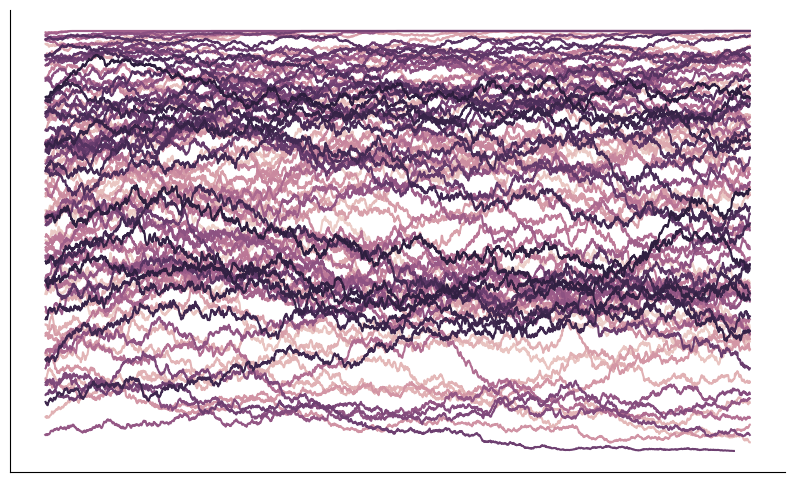

In [5]:
df = data_processor.read_csv_format()
data_processor.visualize(df)

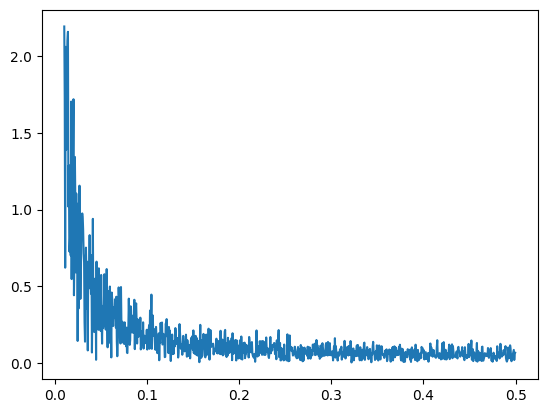

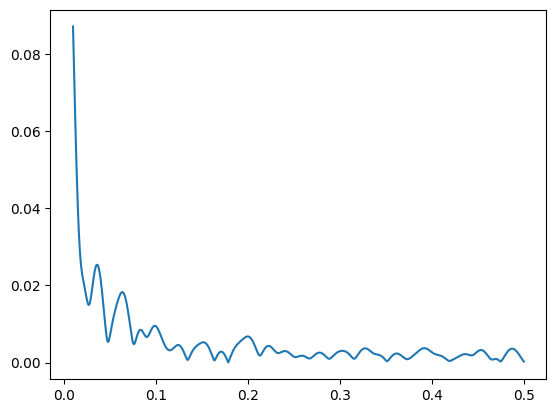

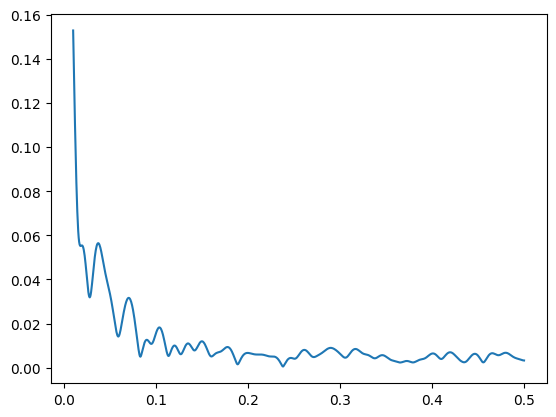

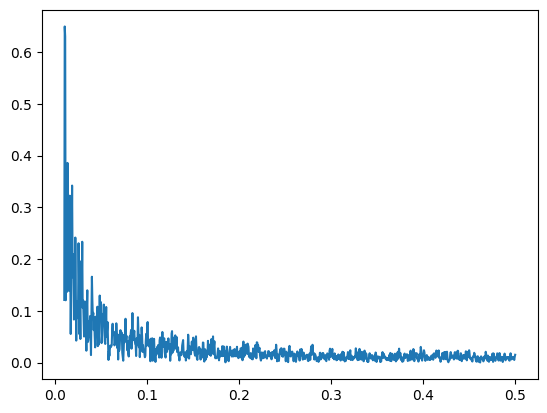

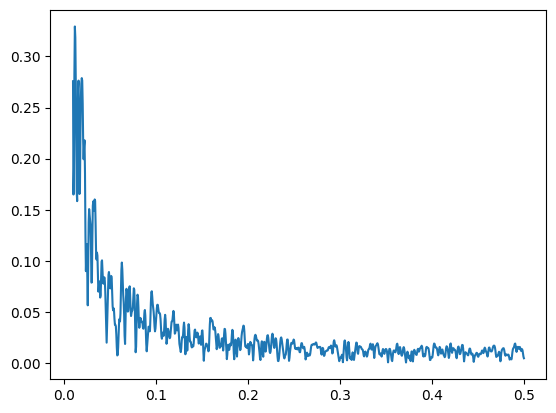

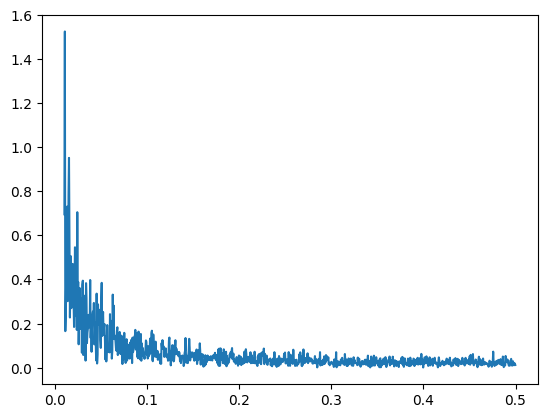

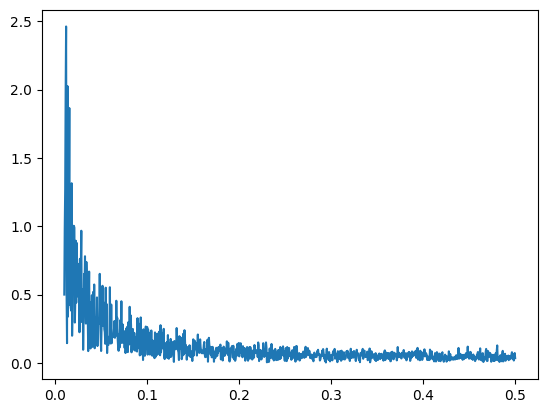

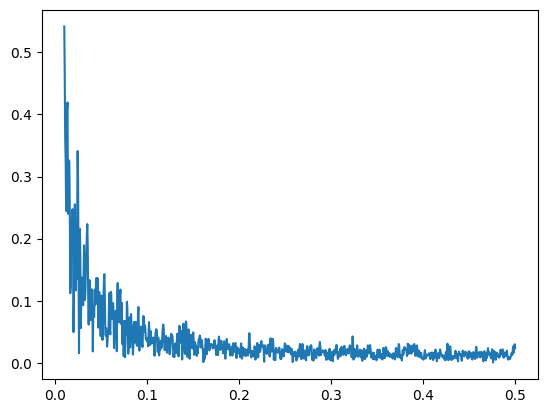

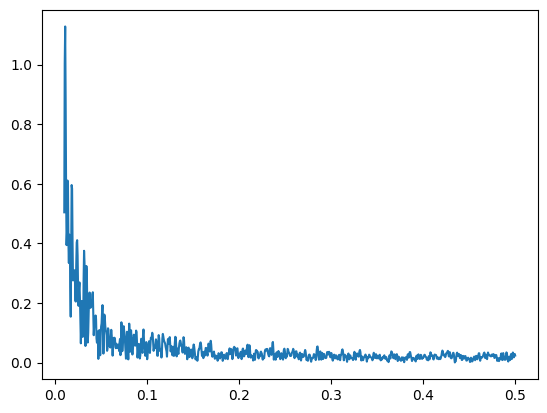

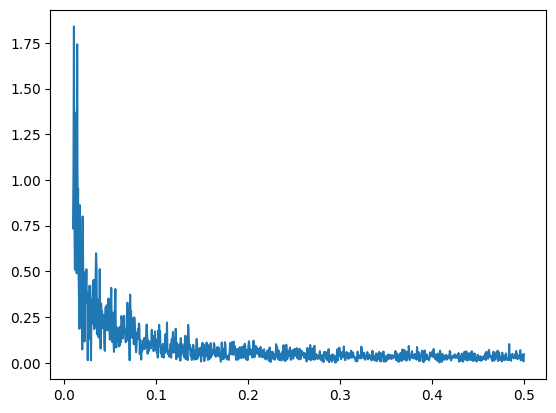

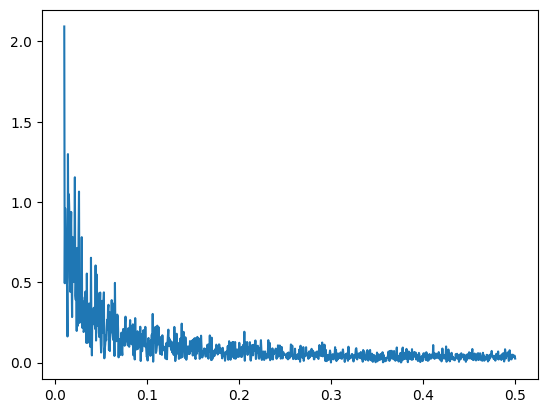

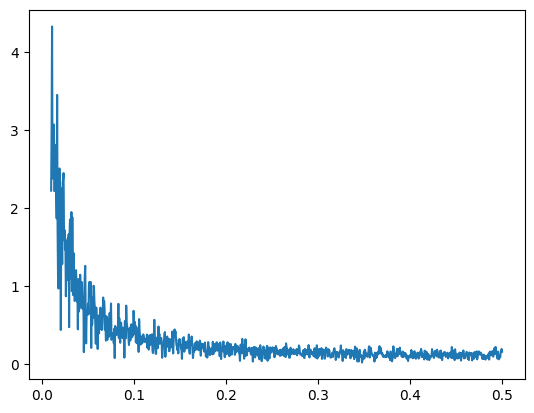

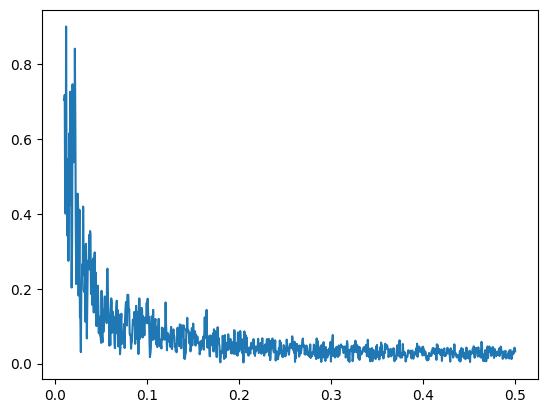

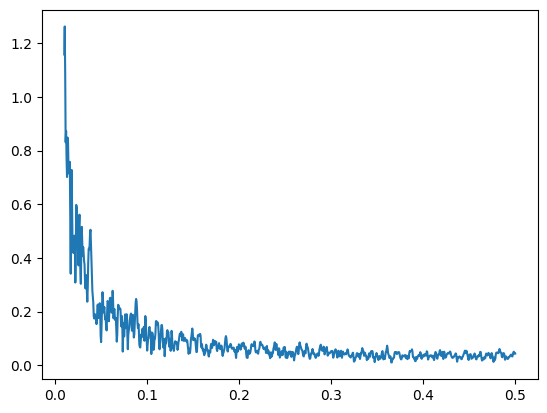

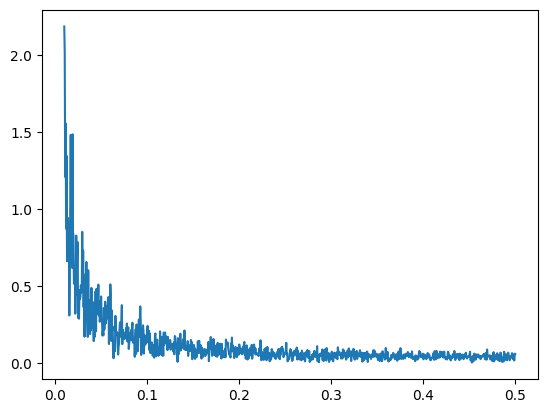

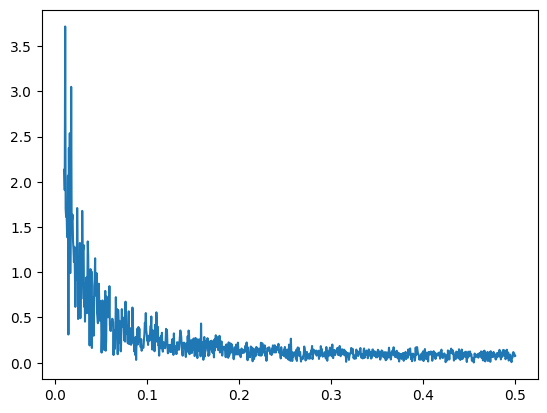

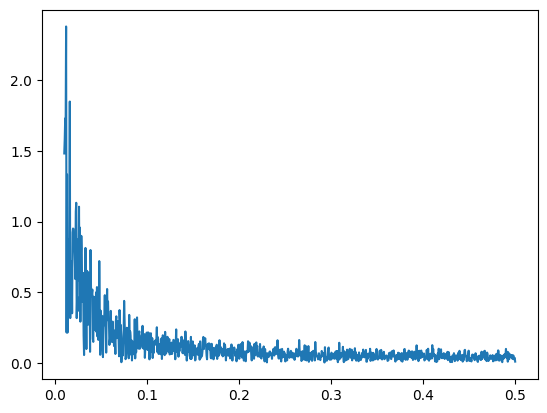

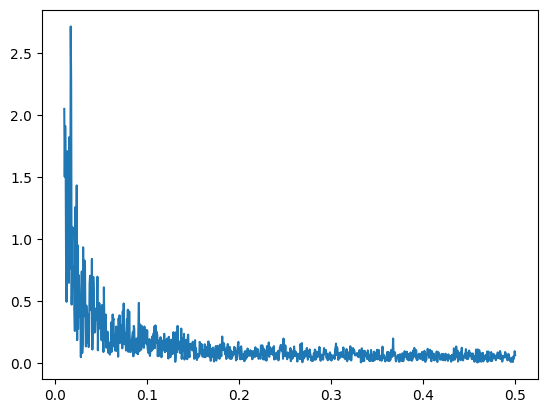

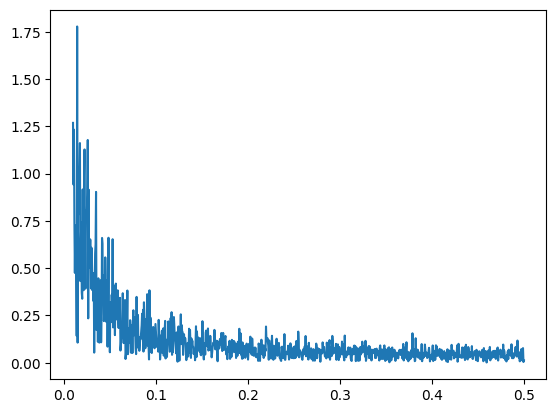

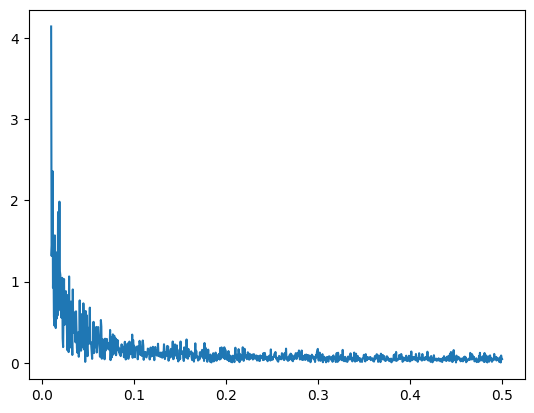

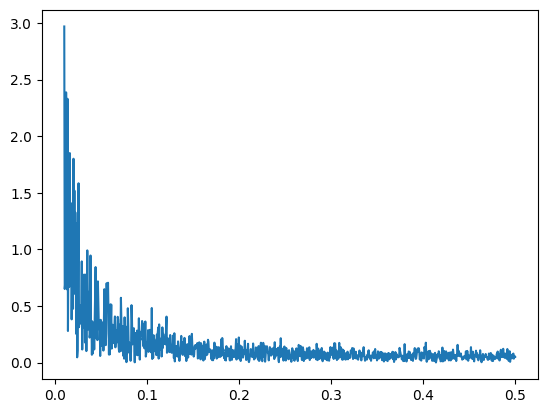

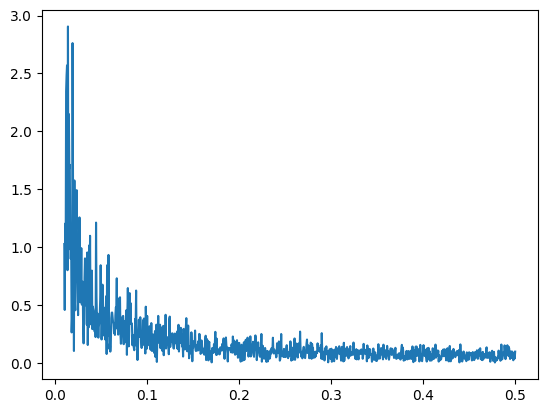

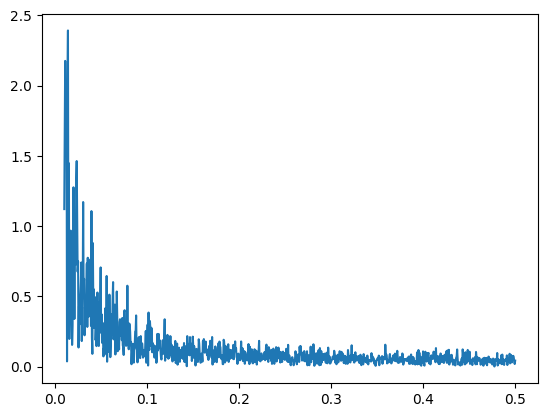

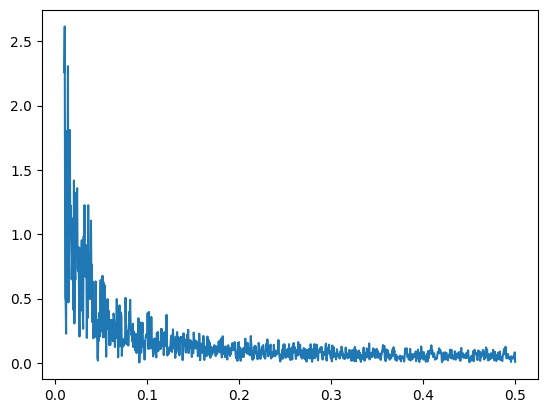

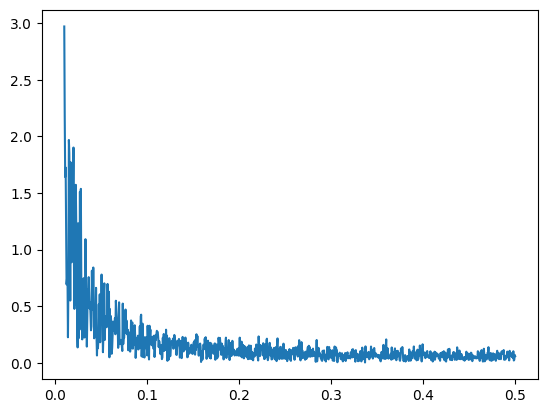

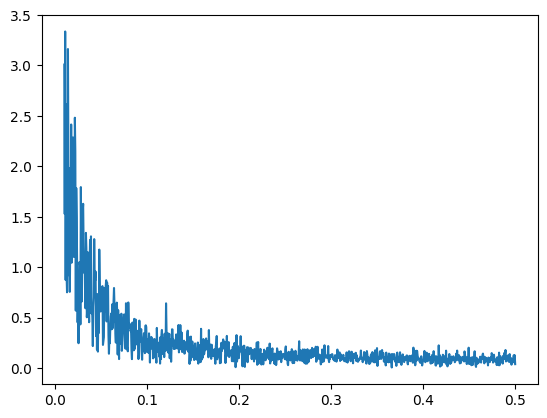

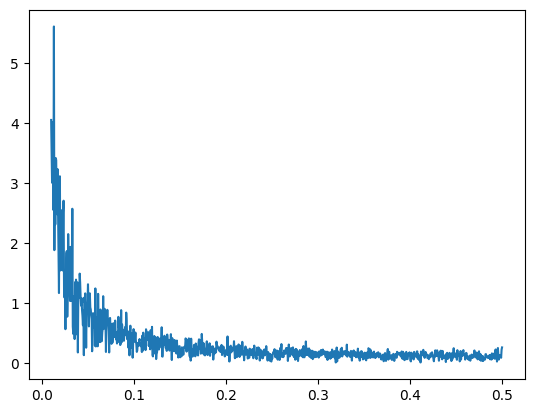

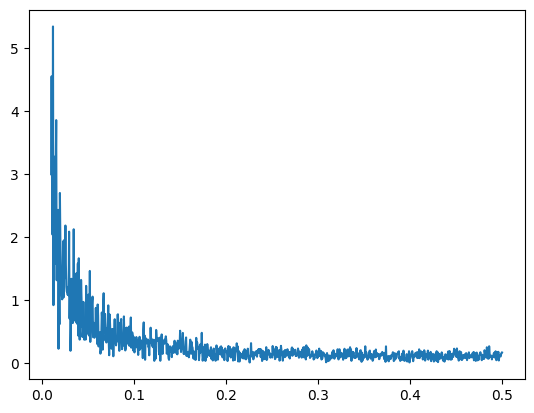

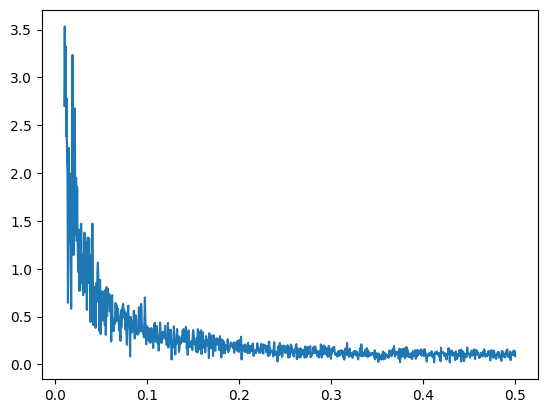

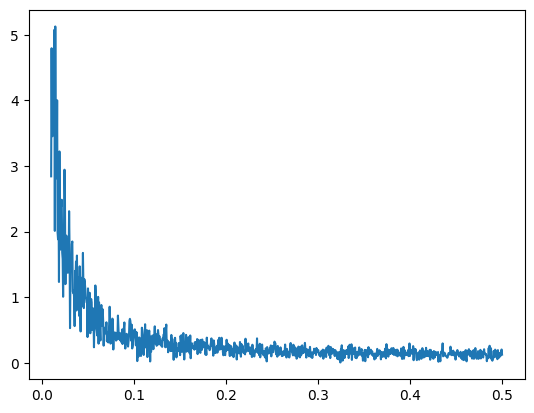

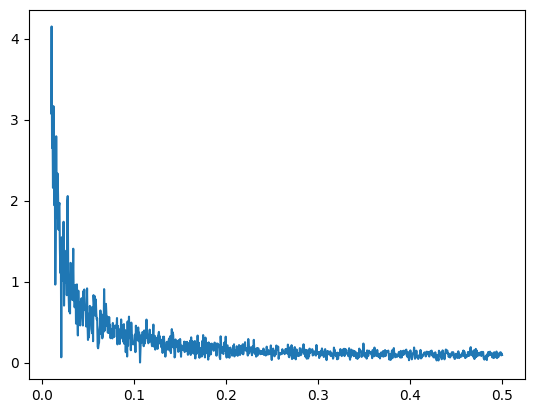

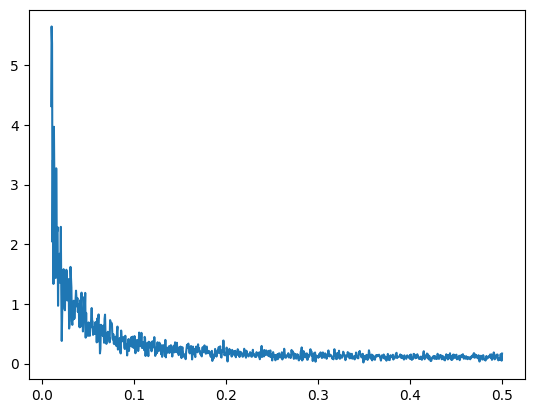

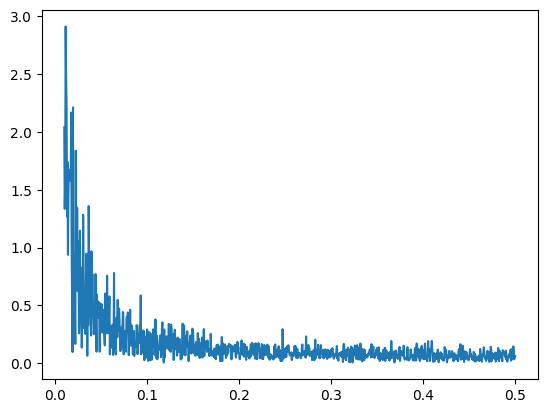

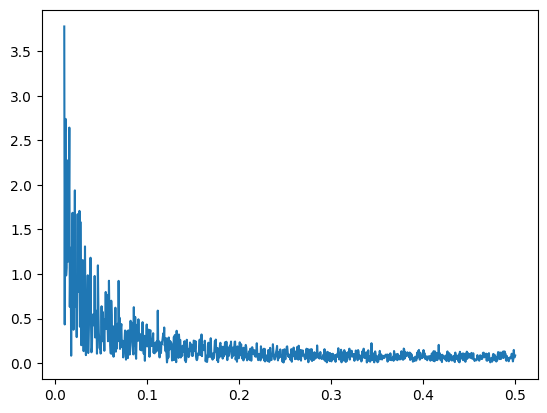

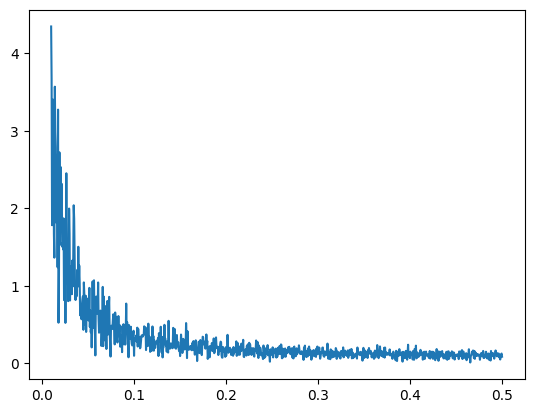

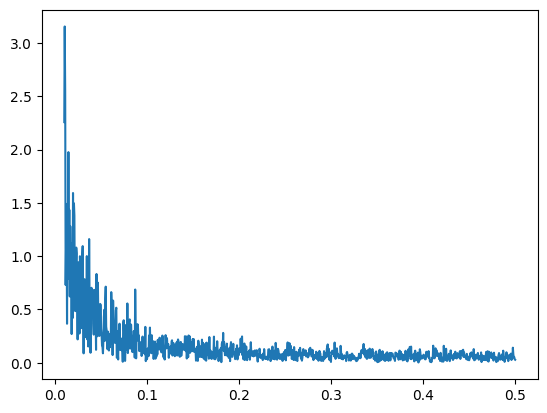

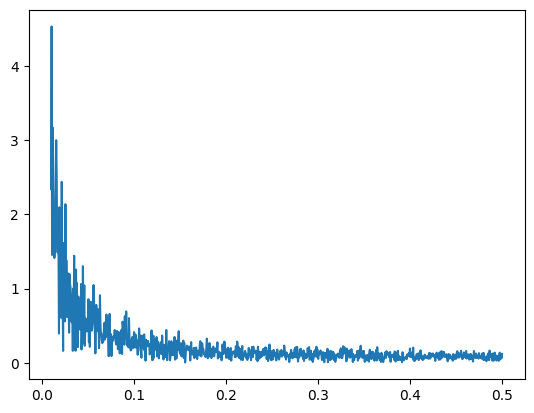

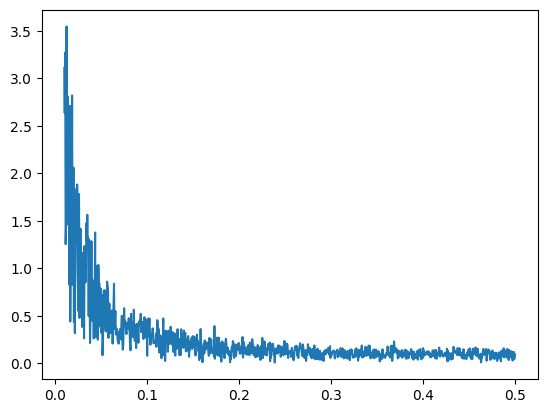

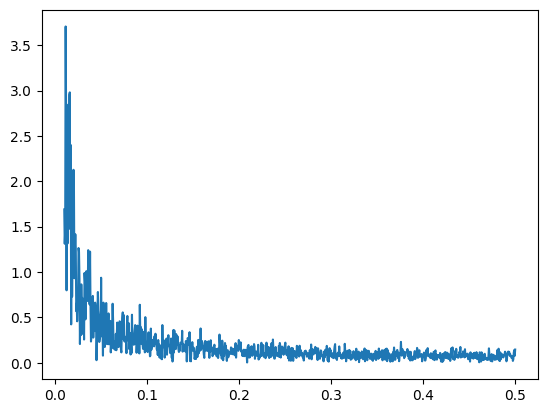

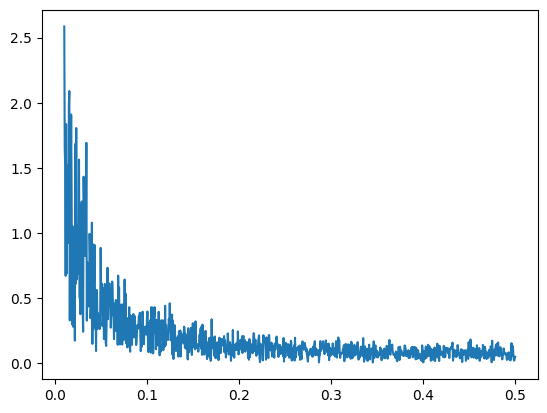

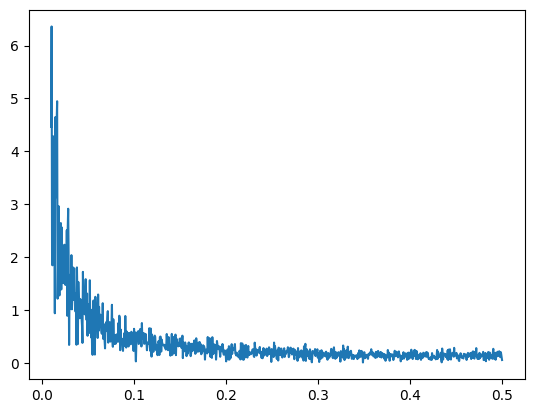

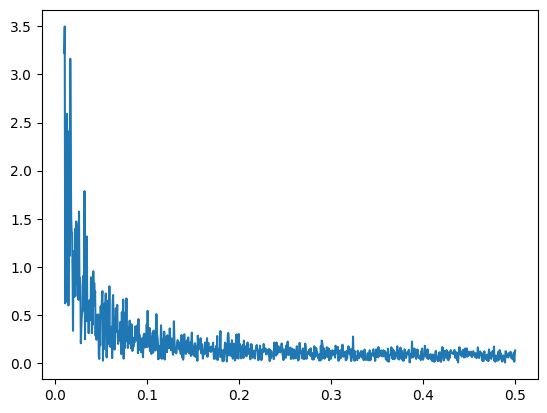

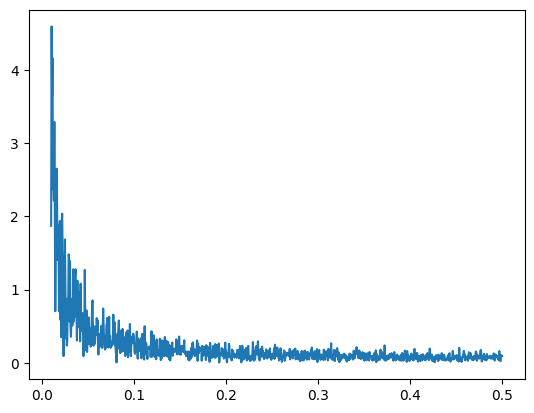

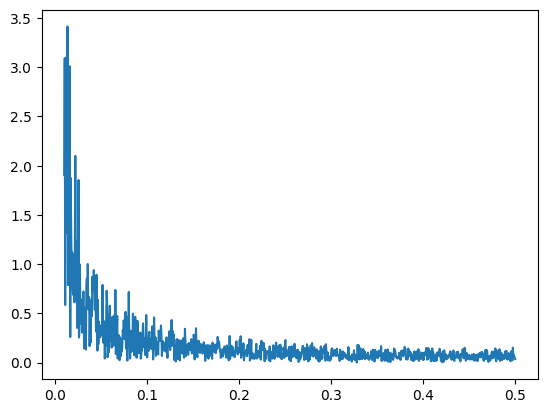

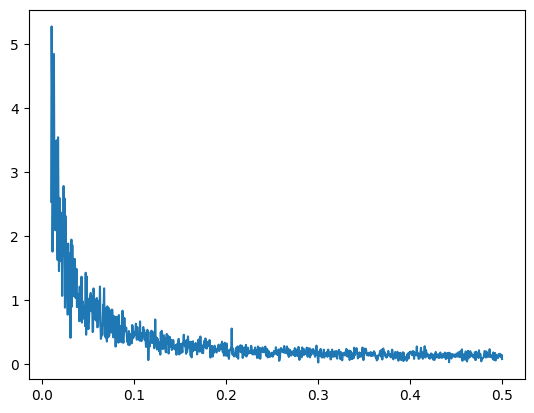

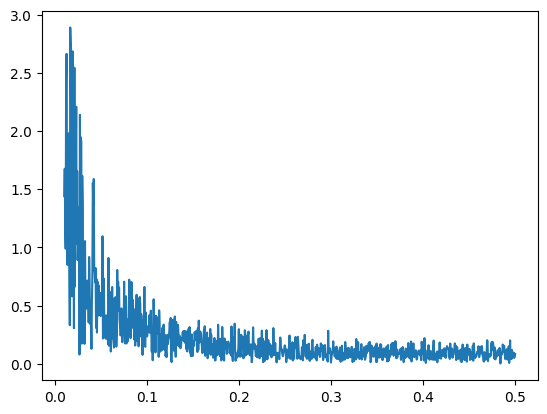

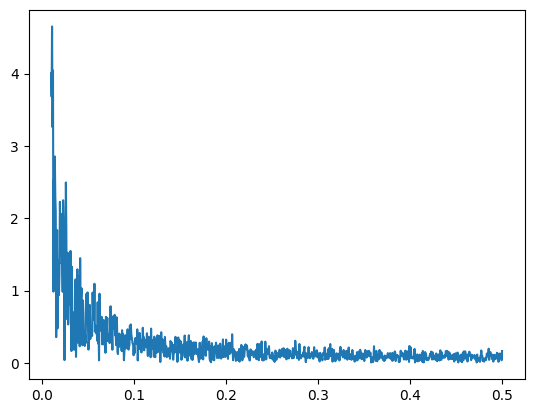

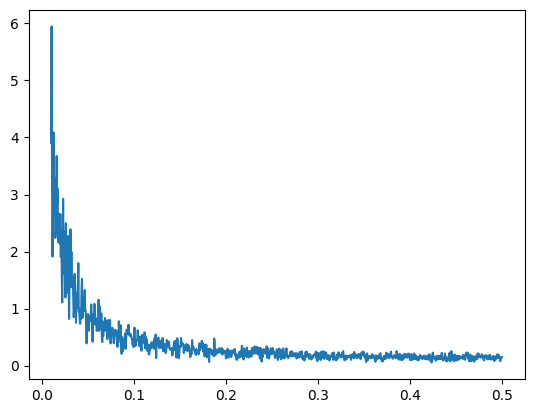

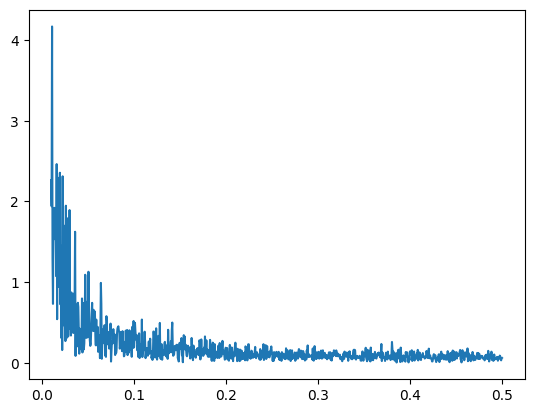

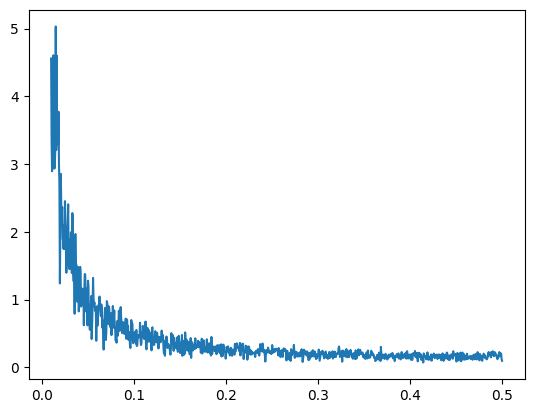

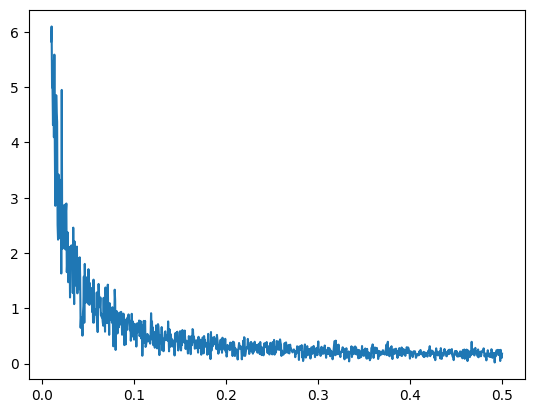

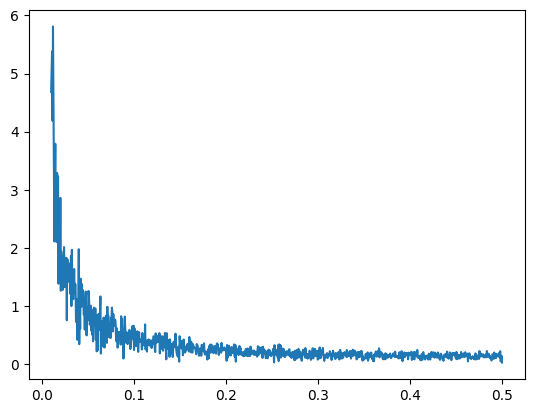

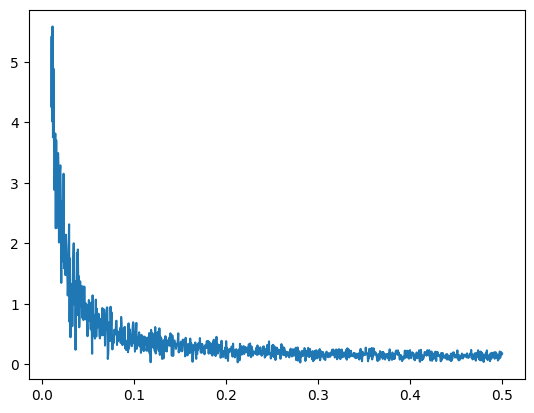

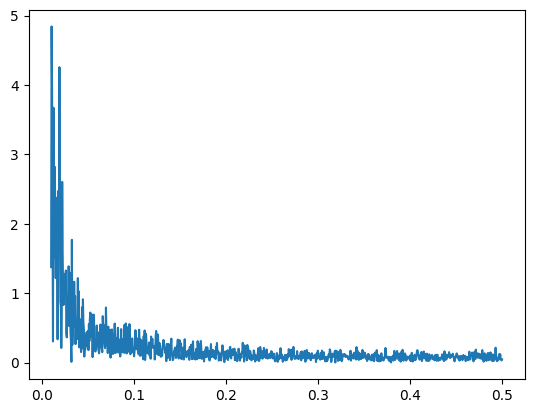

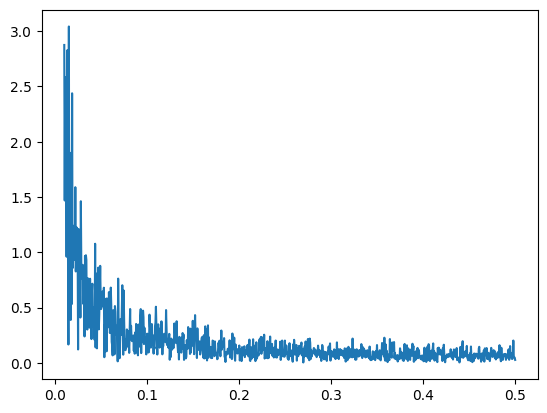

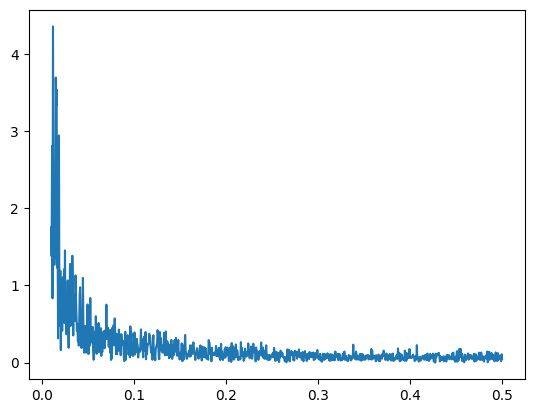

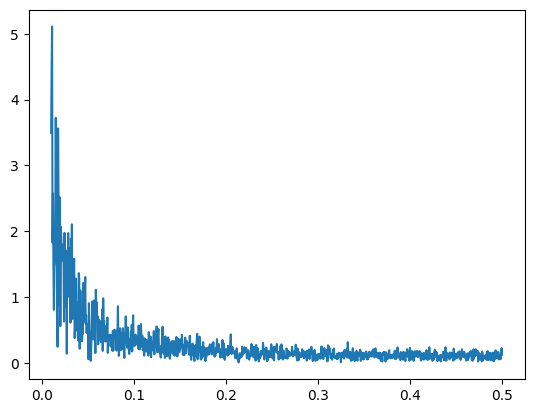

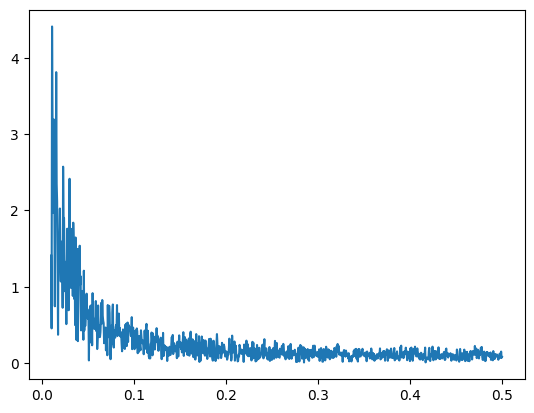

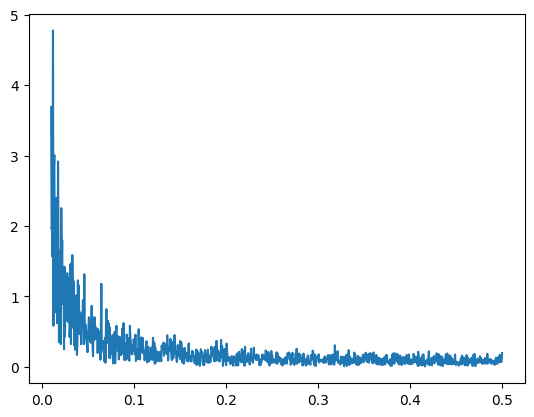

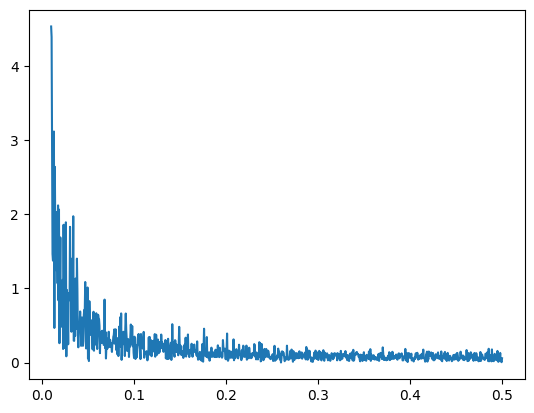

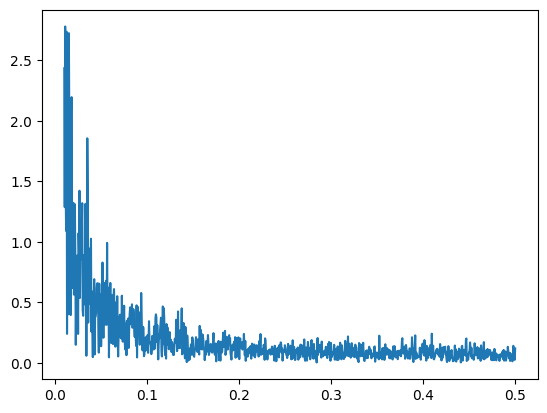

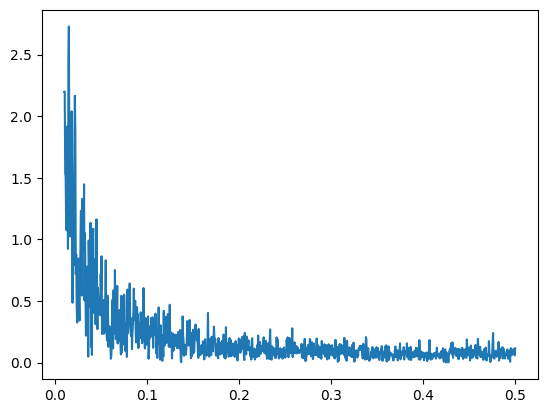

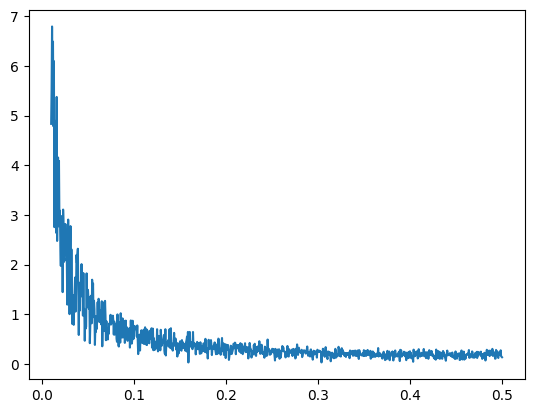

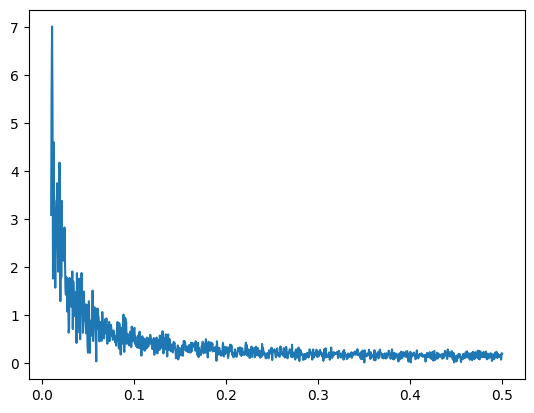

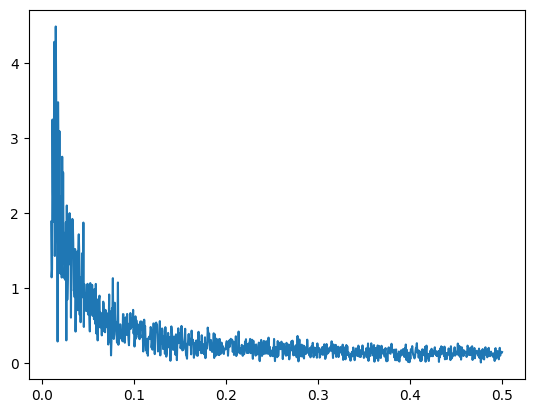

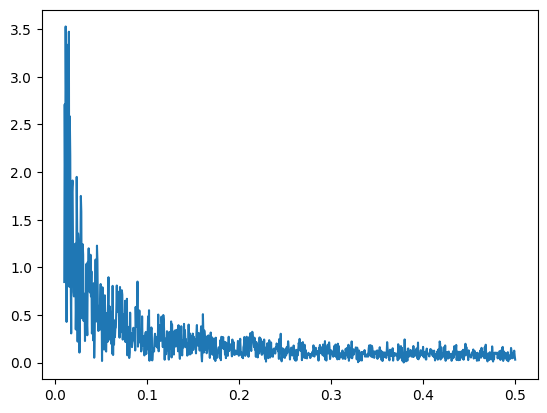

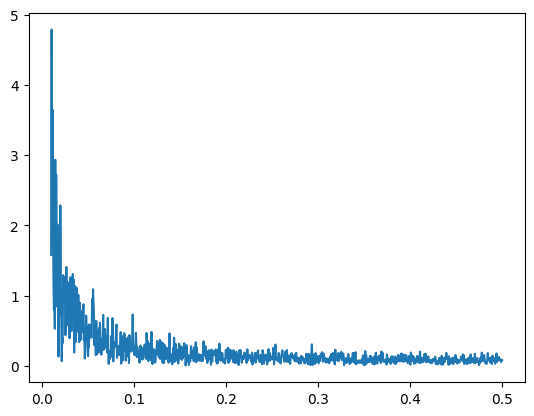

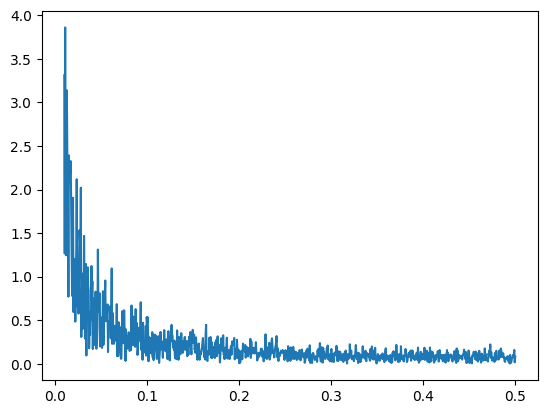

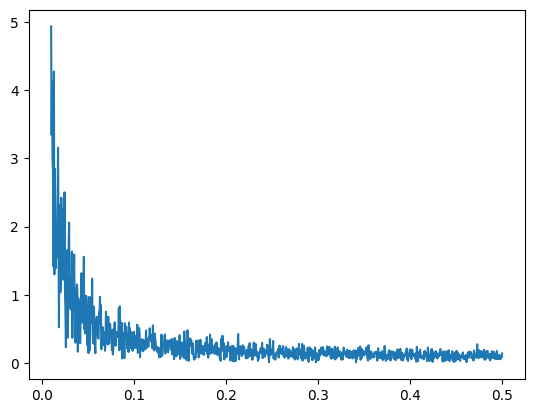

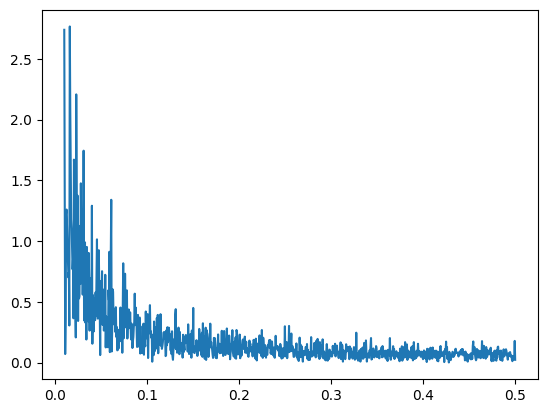

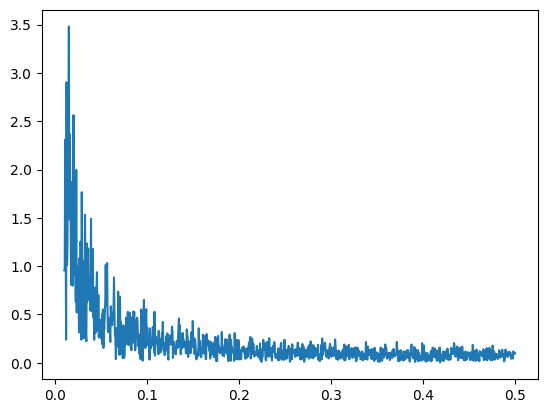

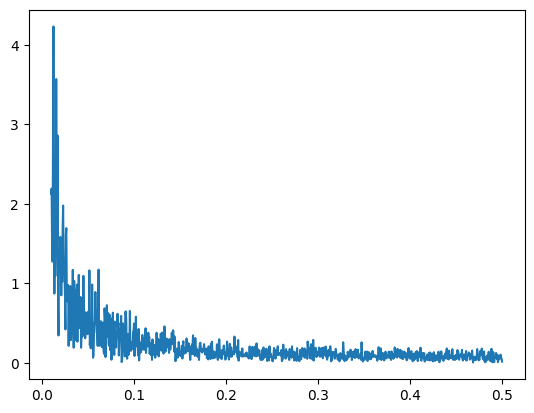

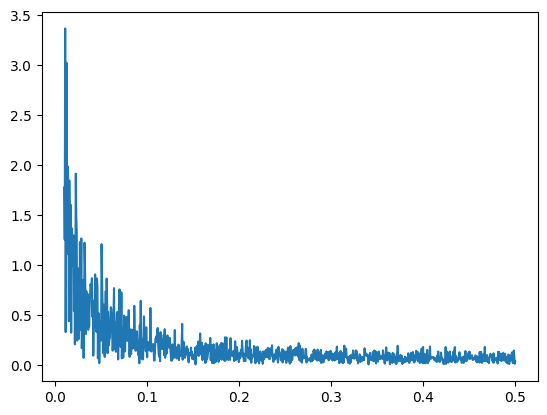

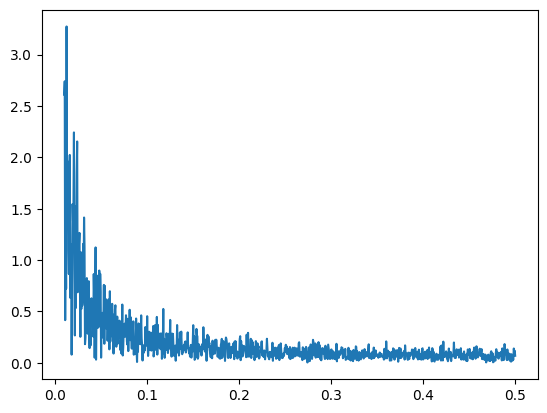

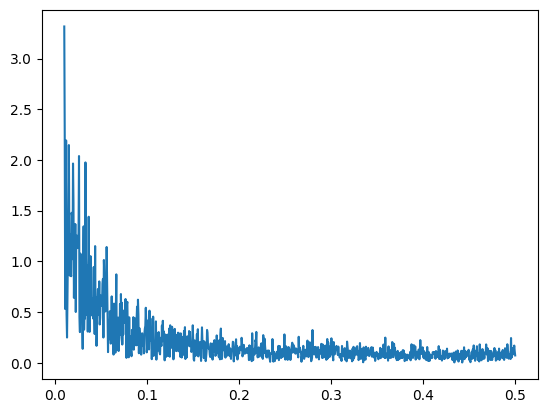

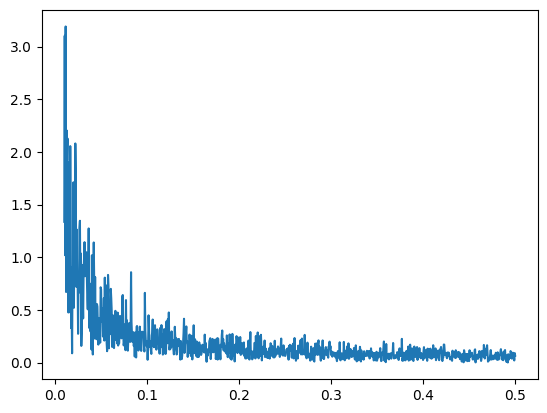

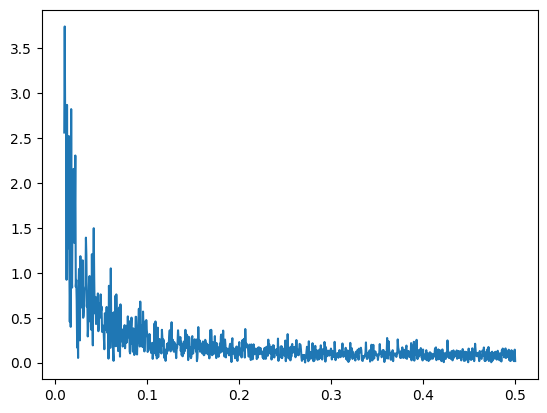

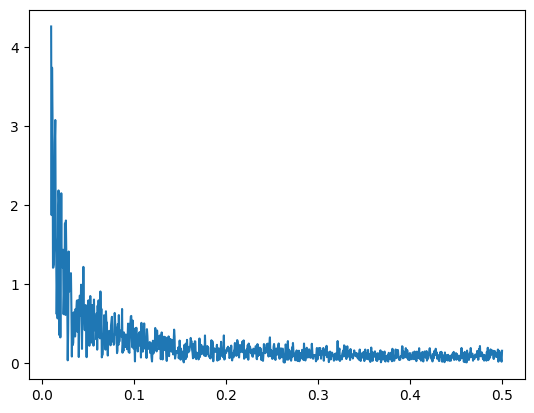

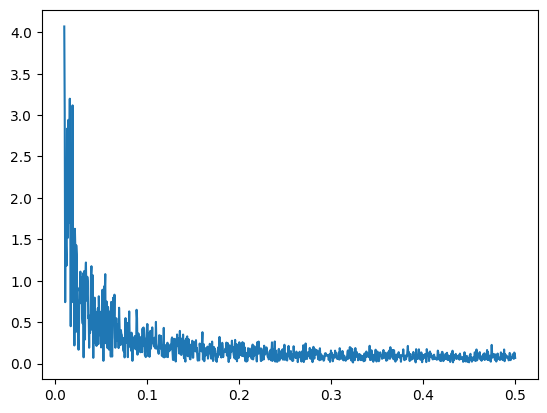

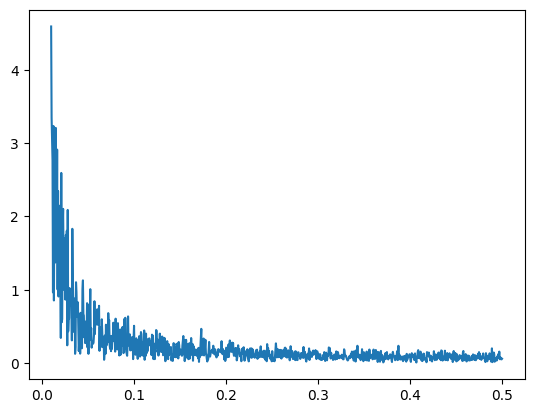

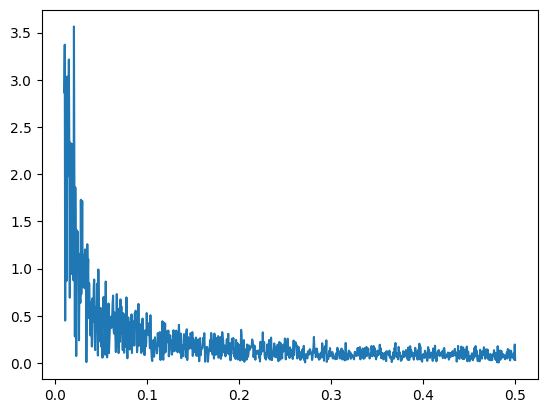

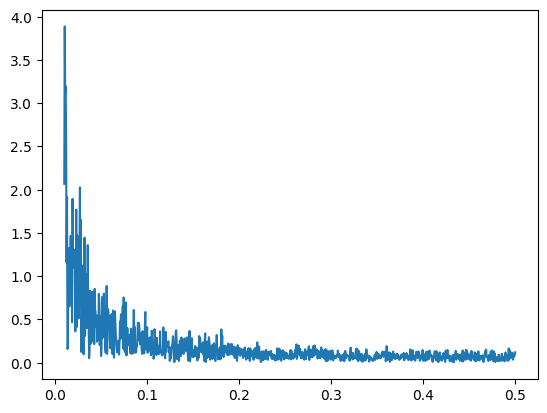

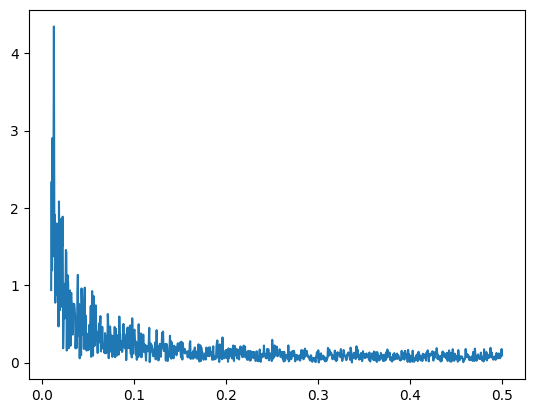

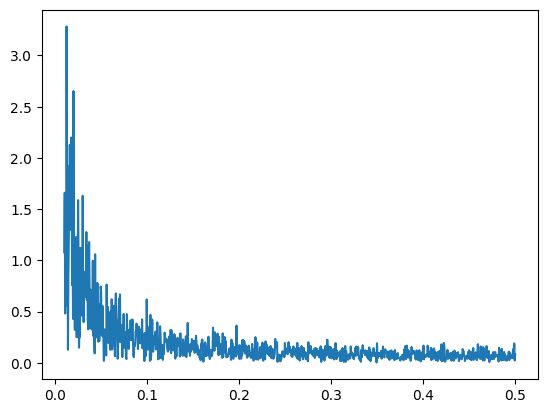

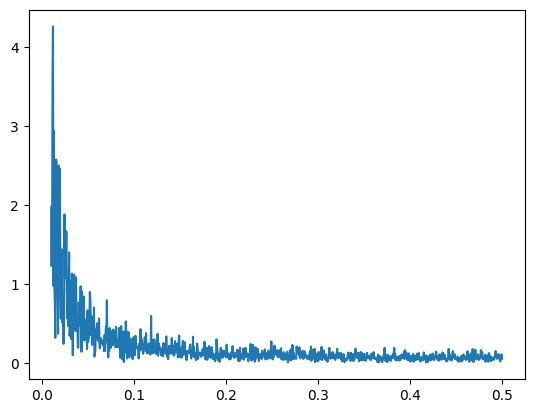

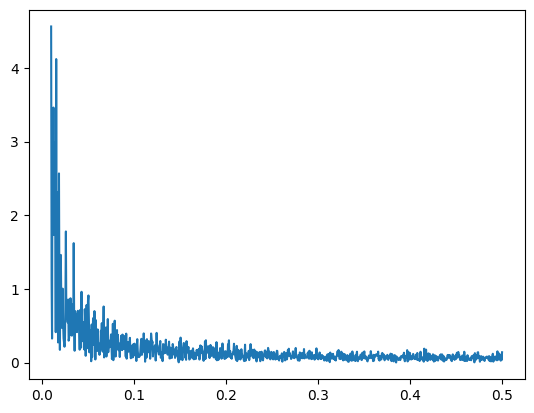

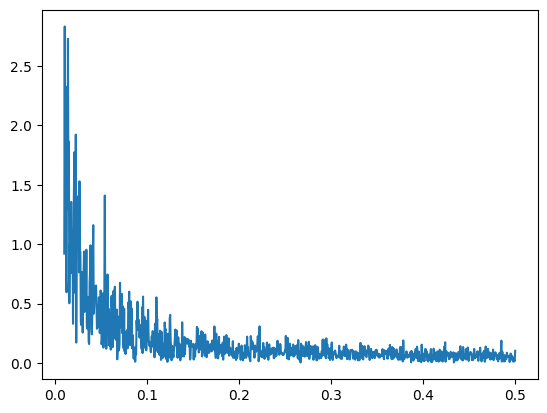

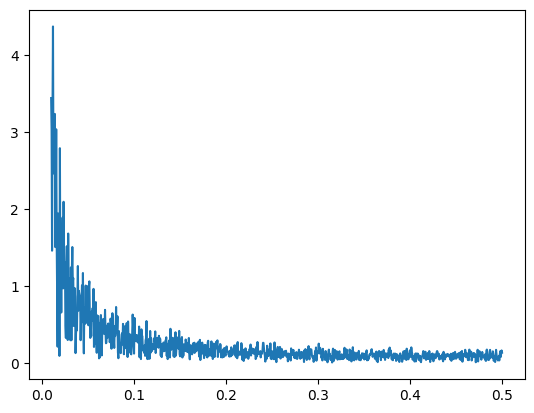

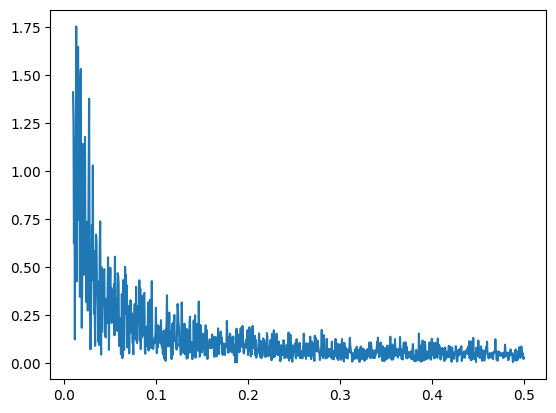

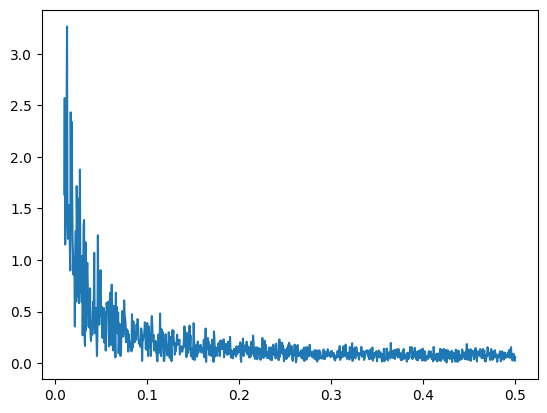

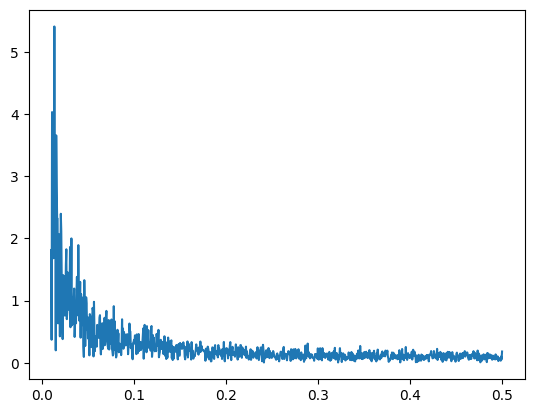

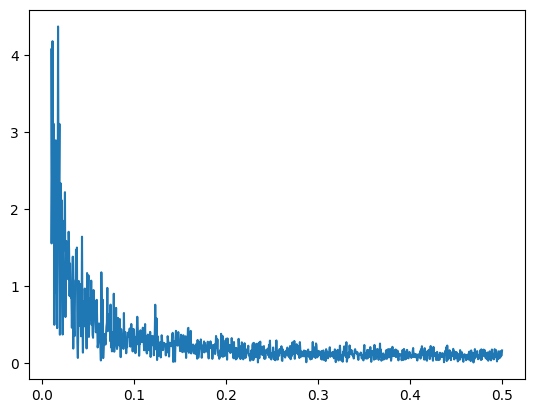

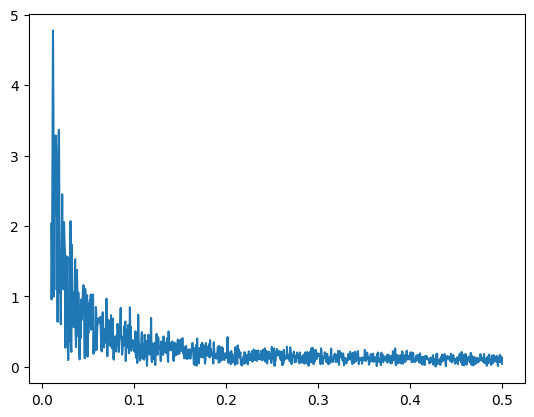

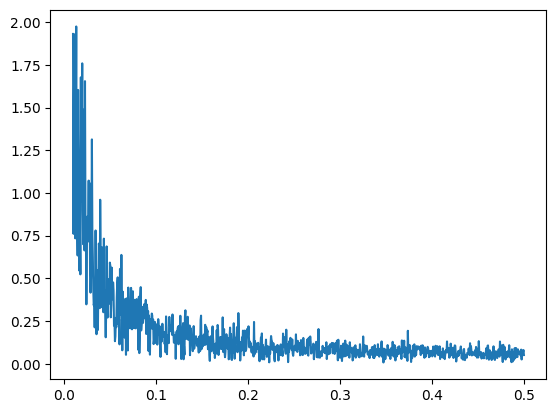

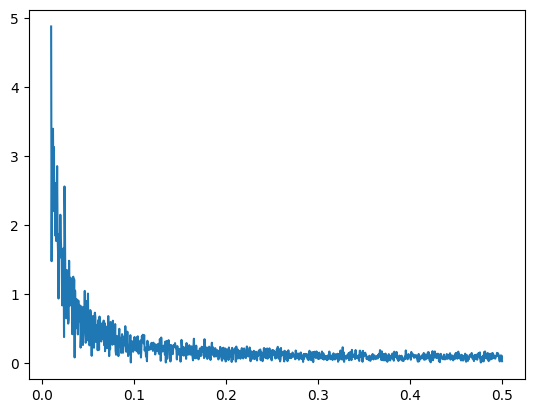

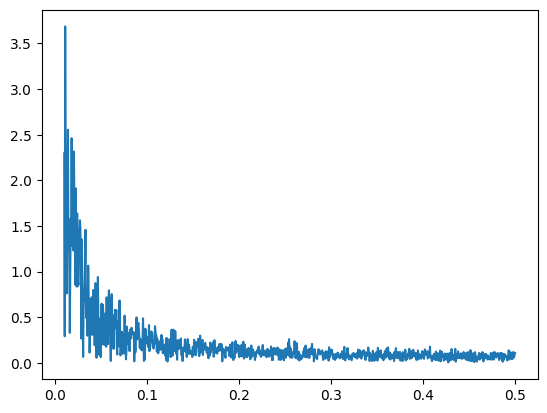

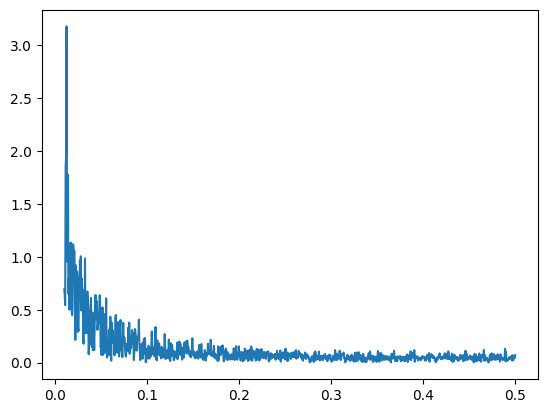

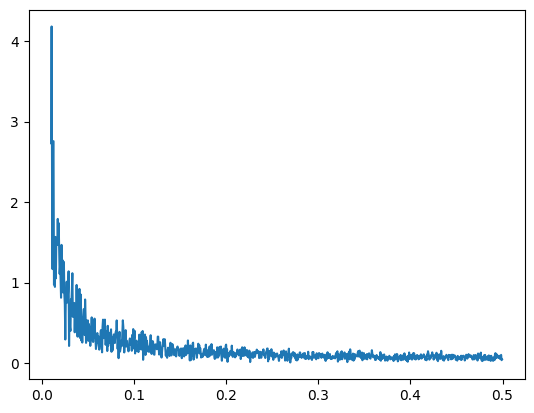

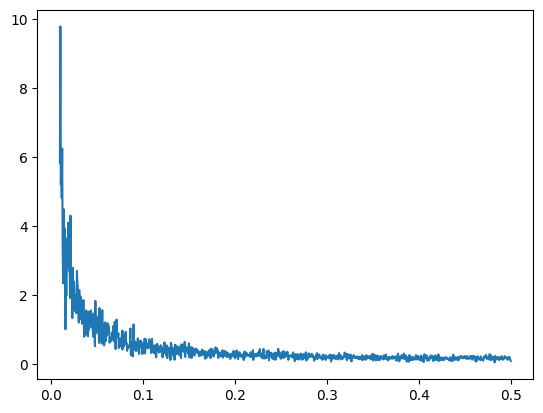

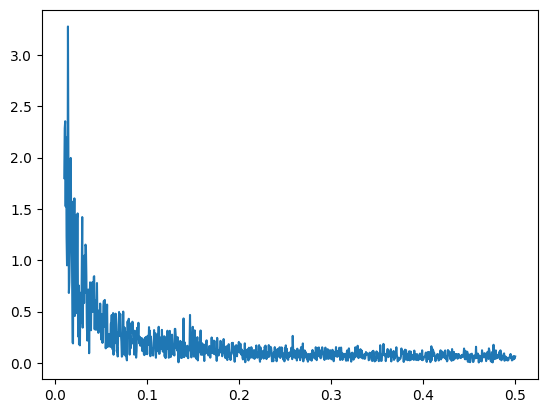

In [6]:

time_step = 1
data_processor.fft_filter(df, time_step, plot=True)

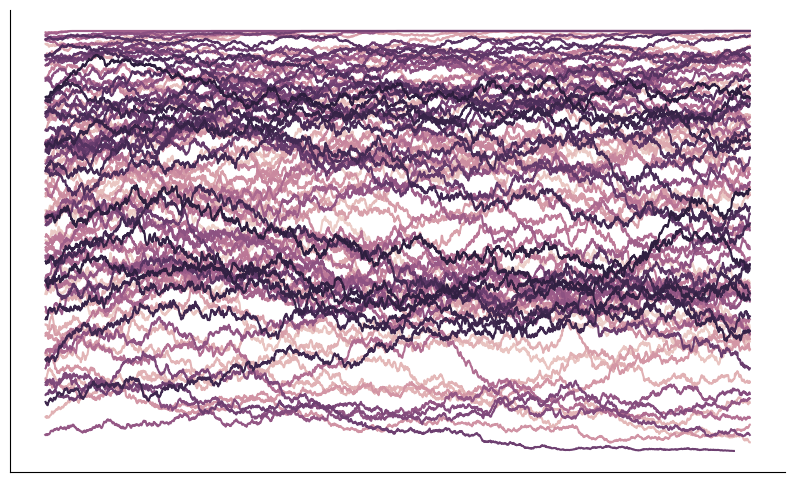

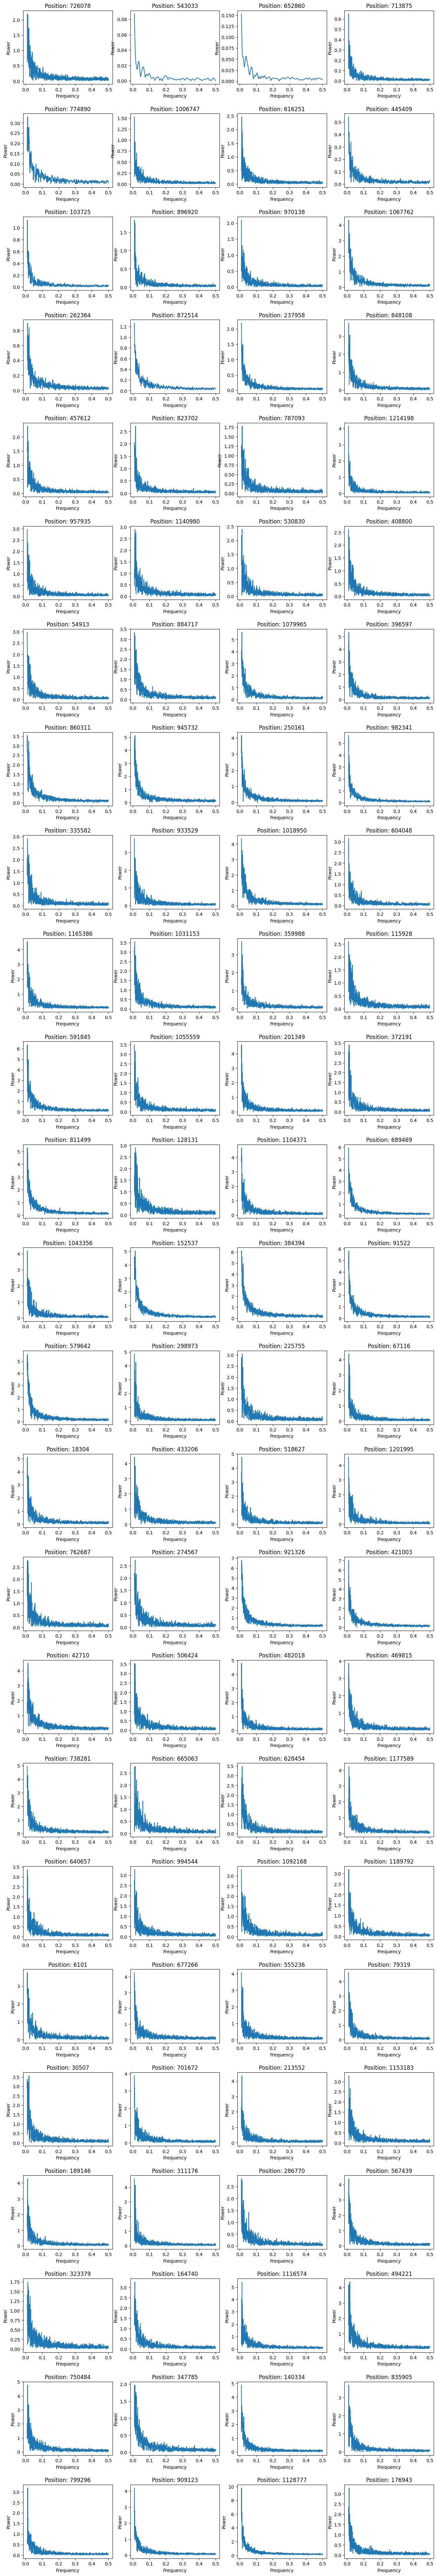

In [9]:
class dataproc:
    def __init__(self, path):
        self.path = path
        self.n = 5

    def read_csv_format(self):
        df = pd.read_csv(self.path)
        return df

    def pick_random(self):
        df = self.read_csv_format()
        unique_QTL = df['Position'].unique()
        select_QTLs = random.sample(unique_QTL.tolist(), self.n)
        df_filter = df[df['Position'].isin(select_QTLs)]
        return df_filter

    def visualize(self, df):
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.lineplot(data=df, x='Generation', y='Frequency', hue='Position', ax=ax, legend=False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(left=False, bottom=False)
        plt.xlabel('')
        plt.ylabel('')
        sns.despine(top=True, right=True)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    def fft_filter(self, df, time_step, plot):
        positions = df['Position'].unique()
        num_positions = len(positions)
        num_plots_per_row = 4  # Adjust the number of plots per row as desired
        num_rows = (num_positions - 1) // num_plots_per_row + 1

        fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(16, 4 * num_rows))
        plt.subplots_adjust(hspace=0.4)

        for i, position in enumerate(positions):
            position_data = df[df['Position'] == position]['Frequency']
            sign = position_data.values.tolist()

            fft_sig = fftpack.fft(sign)
            power = np.abs(fft_sig)
            sample_freq = fftpack.fftfreq(len(sign), d=time_step)

            pos_mask = np.where(sample_freq > 0.01)
            freqs = sample_freq[pos_mask]
            peak_indx = power[pos_mask].argmax()
            peak_freq = freqs[power[pos_mask].argmax()]

            copy_freq_fft = fft_sig.copy()
            copy_freq_fft[np.abs(sample_freq) > 0.05] = 0
            lf_signal = fftpack.ifft(copy_freq_fft)

            if plot:
                row = i // num_plots_per_row
                col = i % num_plots_per_row
                axs[row, col].plot(sample_freq[pos_mask], power[pos_mask])
                axs[row, col].set_title(f'Position: {position}')
                axs[row, col].set_xlabel('Frequency')
                axs[row, col].set_ylabel('Power')

        # Remove empty subplots
        for i in range(num_positions, num_rows * num_plots_per_row):
            row = i // num_plots_per_row
            col = i % num_plots_per_row
            fig.delaxes(axs[row, col])

        plt.show()

# Example usage
path = '/home/etb68/YeastProj.dir/evogen-sims/ET_Yeast/output.dir/Selection_Models/CSCP.dir/genome1_100_0.5.csv'
data_processor = dataproc(path)
df = data_processor.read_csv_format()
data_processor.visualize(df)

time_step = 1
data_processor.fft_filter(df, time_step, plot=True)


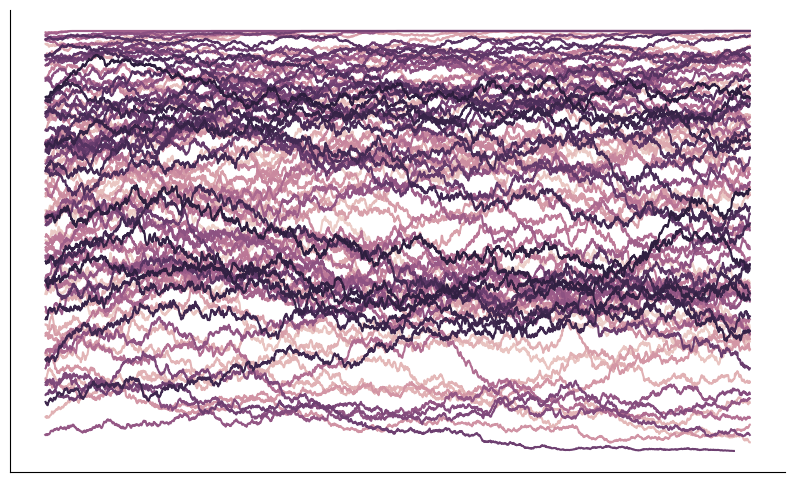

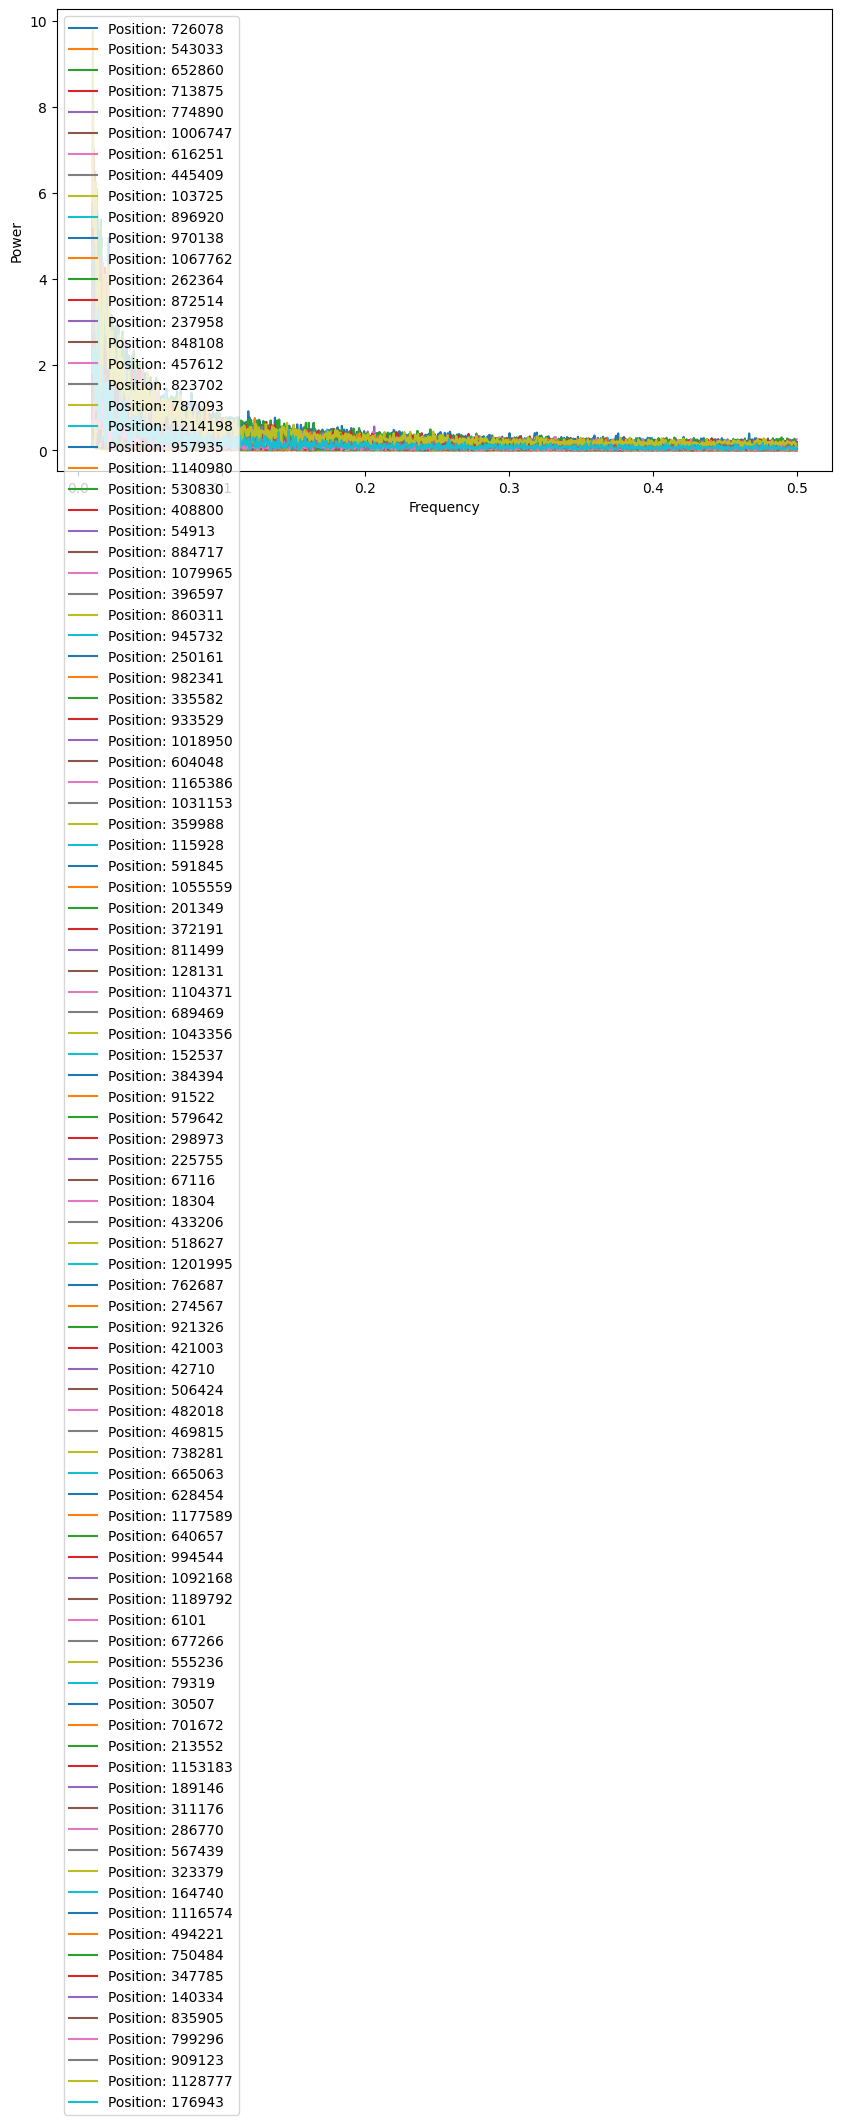

In [10]:
class dataproc:
    def __init__(self, path):
        self.path = path
        self.n = 5

    def read_csv_format(self):
        df = pd.read_csv(self.path)
        return df

    def pick_random(self):
        df = self.read_csv_format()
        unique_QTL = df['Position'].unique()
        select_QTLs = random.sample(unique_QTL.tolist(), self.n)
        df_filter = df[df['Position'].isin(select_QTLs)]
        return df_filter

    def visualize(self, df):
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.lineplot(data=df, x='Generation', y='Frequency', hue='Position', ax=ax, legend=False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(left=False, bottom=False)
        plt.xlabel('')
        plt.ylabel('')
        sns.despine(top=True, right=True)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.show()

    def fft_filter(self, df, time_step, plot):
        fig, ax = plt.subplots(figsize=(10, 6))
        
        for position in df['Position'].unique():
            position_data = df[df['Position'] == position]
            sign = position_data['Frequency'].values.tolist()

            fft_sig = fftpack.fft(sign)
            power = np.abs(fft_sig)
            sample_freq = fftpack.fftfreq(len(sign), d=time_step)

            pos_mask = np.where(sample_freq > 0.01)
            freqs = sample_freq[pos_mask]
            peak_indx = power[pos_mask].argmax()
            peak_freq = freqs[power[pos_mask].argmax()]

            copy_freq_fft = fft_sig.copy()
            copy_freq_fft[np.abs(sample_freq) > 0.05] = 0
            lf_signal = fftpack.ifft(copy_freq_fft)

            if plot:
                ax.plot(sample_freq[pos_mask], power[pos_mask], label=f'Position: {position}')

        ax.set_xlabel('Frequency')
        ax.set_ylabel('Power')
        ax.legend()
        plt.show()

# Example usage
data_processor = dataproc(path)
df = data_processor.read_csv_format()
data_processor.visualize(df)

time_step = 1
data_processor.fft_filter(df, time_step, plot=True)


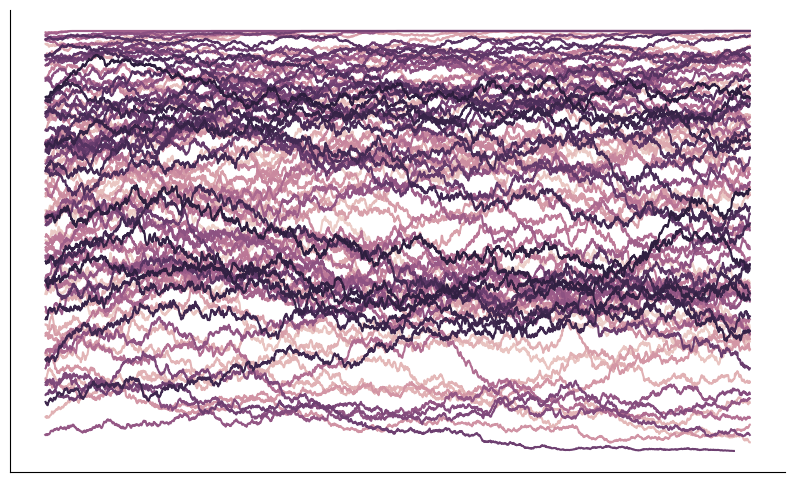

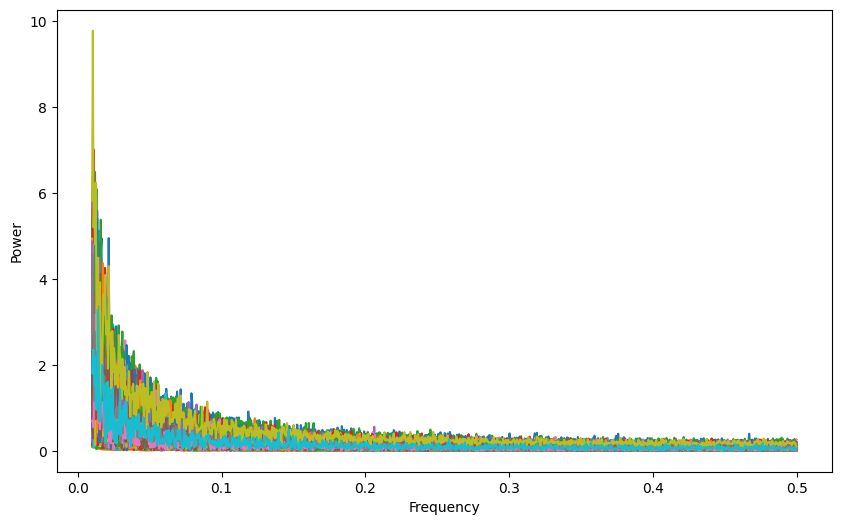

In [11]:
class dataproc:
    def __init__(self, path):
        self.path = path
        self.n = 5

    def read_csv_format(self):
        df = pd.read_csv(self.path)
        return df

    def pick_random(self):
        df = self.read_csv_format()
        unique_QTL = df['Position'].unique()
        select_QTLs = random.sample(unique_QTL.tolist(), self.n)
        df_filter = df[df['Position'].isin(select_QTLs)]
        return df_filter

    def visualize(self, df):
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.lineplot(data=df, x='Generation', y='Frequency', hue='Position', ax=ax, legend=False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(left=False, bottom=False)
        plt.xlabel('')
        plt.ylabel('')
        sns.despine(top=True, right=True)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.show()

    def fft_filter(self, df, time_step, plot):
        fig, ax = plt.subplots(figsize=(10, 6))
        
        for position in df['Position'].unique():
            position_data = df[df['Position'] == position]
            sign = position_data['Frequency'].values.tolist()

            fft_sig = fftpack.fft(sign)
            power = np.abs(fft_sig)
            sample_freq = fftpack.fftfreq(len(sign), d=time_step)

            pos_mask = np.where(sample_freq > 0.01)
            freqs = sample_freq[pos_mask]
            peak_indx = power[pos_mask].argmax()
            peak_freq = freqs[power[pos_mask].argmax()]

            copy_freq_fft = fft_sig.copy()
            copy_freq_fft[np.abs(sample_freq) > 0.05] = 0
            lf_signal = fftpack.ifft(copy_freq_fft)

            if plot:
                ax.plot(sample_freq[pos_mask], power[pos_mask], label=f'Position: {position}')

        ax.set_xlabel('Frequency')
        ax.set_ylabel('Power')
        ax.legend().remove()
        plt.show()

# Example usage
path = '/home/etb68/YeastProj.dir/evogen-sims/ET_Yeast/output.dir/Selection_Models/CSCP.dir/genome1_100_0.5.csv'
data_processor = dataproc(path)
df = data_processor.read_csv_format()
data_processor.visualize(df)

time_step = 1
data_processor.fft_filter(df, time_step, plot=True)
